# This file is used for exploring this specific data 


In [14]:
import os
import yaml
from matplotlib import pyplot as plt
from raman_loader import RamanLoader


In [15]:
def load_yaml_file(file_path):
    with open(file_path, 'r') as file:
        data = yaml.safe_load(file)
    return data

In [16]:

cfg_dir = "/home/aneesh/sandbox/multi-modal/mangos/eda/config"
cfg_f   = "raman.yaml"
cfg_filepath = os.path.join(cfg_dir, cfg_f)

cfg = load_yaml_file(cfg_filepath)


In [17]:
cfg

{'raman': {'path': '/home/aneesh/sandbox/multi-modal/mangos/dataset/SP2024/Data - Mango/Raman_mango/Processed_data',
  'data_f': 'Raman.csv'}}

In [18]:
raman_cfg = cfg['raman']

raman_cfg

{'path': '/home/aneesh/sandbox/multi-modal/mangos/dataset/SP2024/Data - Mango/Raman_mango/Processed_data',
 'data_f': 'Raman.csv'}

In [19]:
loader = RamanLoader(raman_cfg, normalize=True)
loader.load()
loader[490]

tensor([7.2759, 7.2759, 7.2759, 7.2759, 7.2759, 7.2759, 7.2759, 7.2759, 7.2759,
        7.3257, 7.3251, 7.3232, 7.3202, 7.3180, 7.3160, 7.3162, 7.3175, 7.3183,
        7.3204, 7.3243, 7.3290, 7.3354, 7.3426, 7.3507, 7.3597, 7.3676, 7.3731,
        7.3760, 7.3766, 7.3774, 7.3784, 7.3803, 7.3841, 7.3898, 7.3969, 7.4034,
        7.4075, 7.4098, 7.4100, 7.4094, 7.4092, 7.4092, 7.4095, 7.4101, 7.4087,
        7.4049, 7.3973, 7.3869, 7.3764, 7.3671, 7.3598, 7.3571, 7.3582, 7.3623,
        7.3675, 7.3707, 7.3724, 7.3730, 7.3726, 7.3726, 7.3728, 7.3732, 7.3750,
        7.3766, 7.3763, 7.3739, 7.3693, 7.3636, 7.3578, 7.3519, 7.3472, 7.3444,
        7.3435, 7.3448, 7.3474, 7.3500, 7.3512, 7.3498, 7.3442, 7.3340, 7.3184,
        7.2975, 7.2737, 7.2493, 7.2264, 7.2074, 7.1942, 7.1888, 7.1919, 7.2018,
        7.2172, 7.2368, 7.2582, 7.2789, 7.2962, 7.3077, 7.3144, 7.3160, 7.3135,
        7.3080, 7.3011, 7.2946, 7.2905, 7.2855, 7.2793, 7.2703, 7.2581, 7.2437,
        7.2281, 7.2124, 7.2015, 7.1967, 

In [20]:
raman_df = loader.get_features()
ids = loader.get_ids()

ids
# raman_df

0        1
1        2
2        3
3        4
4        5
      ... 
483    486
484    487
485    488
486    489
487    490
Name: 0, Length: 488, dtype: int64

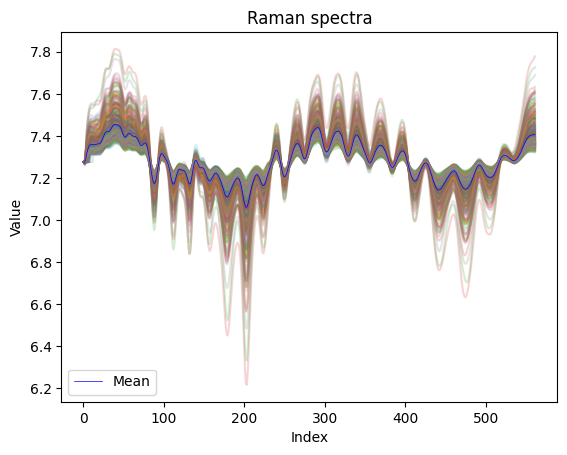

In [21]:
for row in range(len(raman_df)):
#     print (row)
    plt.plot(raman_df.iloc[row,:], alpha=0.2)

# Calculate and plot the mean
mean_values = raman_df.mean(axis=0)

#Plot also the mean
plt.plot(mean_values.iloc[:], color='blue', linewidth=0.5, label='Mean')


# Adding legend and labels
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Raman spectra')

plt.show()


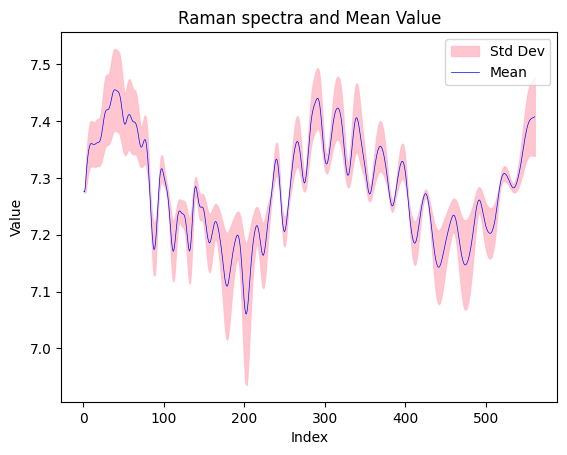

In [22]:
std_dev = raman_df.std(axis=0)
# Plot the standard deviation as a shaded area
plt.fill_between(mean_values.index[:], 
                 mean_values.iloc[:] - std_dev.iloc[:], 
                 mean_values.iloc[:] + std_dev.iloc[:], 
                 color='pink', alpha=0.9, label='Std Dev')

#plot mean
#Plot also the mean
plt.plot(mean_values.iloc[:], color='blue', linewidth=0.5, label='Mean')

# Adding legend and labels
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Raman spectra and Mean Value')


plt.show()


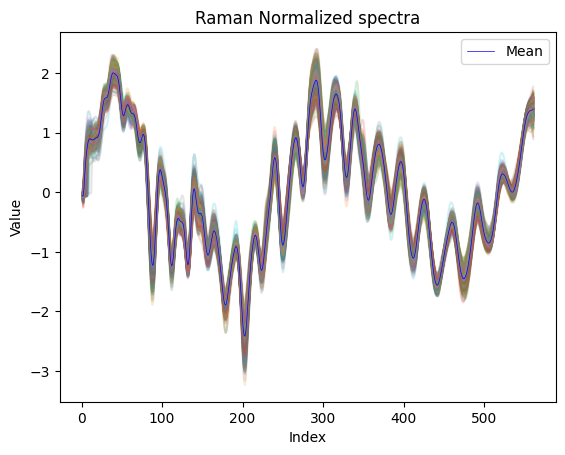

In [27]:
#Further SNV type normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

df = raman_df
scaler = StandardScaler()
# scaler = MinMaxScaler()
# Fit and transform the data
# df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_normalized = pd.DataFrame(scaler.fit_transform(df.T).T, columns=df.columns) #Apply normalization over rows

for row in range(len(df)):
#     print (row)
    plt.plot(df_normalized.iloc[row,:], alpha=0.2)

# Calculate and plot the mean
mean_values = df_normalized.mean(axis=0)

#Plot also the mean
plt.plot(mean_values.iloc[:], color='blue', linewidth=0.5, label='Mean')


# Adding legend and labels
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Raman Normalized spectra')

plt.show()


Could not retreive the feature for id 0. 0
Could not retreive the feature for id 288. 288
Could not retreive the feature for id 404. 404


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


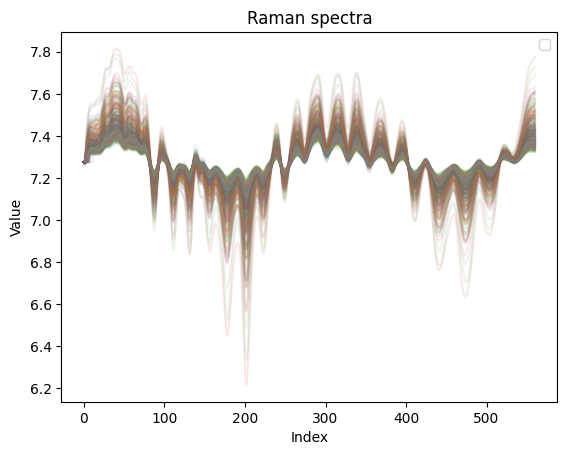

In [23]:
data = [d for d in loader]

for d in data:
    if d is None:
        pass
    else:
        plt.plot(d, alpha=0.1)

# Calculate and plot the mean
# mean_values = raman_df.mean(axis=0)

#Plot also the mean
# plt.plot(mean_values.iloc[:], color='blue', linewidth=0.5, label='Mean')


# Adding legend and labels
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Raman spectra')

plt.show()

In [ ]:
# Raman in log scale
import torch

Could not retreive the feature for id 0. 0
Could not retreive the feature for id 288. 288
Could not retreive the feature for id 404. 404


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


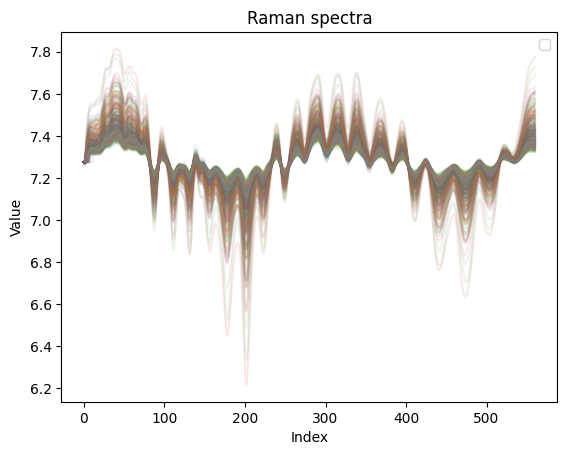

In [ ]:
data = [d for d in loader if d is not None]

# print([torch.log(min(d)) for d in data])
for d in data:
    if d is None:
        pass
    else:
        plt.plot(d, alpha=0.1)

# Calculate and plot the mean
# mean_values = raman_df.mean(axis=0)

# #Plot also the mean
# plt.plot(mean_values.iloc[:], color='blue', linewidth=0.5, label='Mean')


# Adding legend and labels
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Raman spectra')

plt.show()

In [ ]:
d

tensor([7.2759, 7.2759, 7.2759, 7.2759, 7.2759, 7.2759, 7.2759, 7.2759, 7.2759,
        7.3257, 7.3251, 7.3232, 7.3202, 7.3180, 7.3160, 7.3162, 7.3175, 7.3183,
        7.3204, 7.3243, 7.3290, 7.3354, 7.3426, 7.3507, 7.3597, 7.3676, 7.3731,
        7.3760, 7.3766, 7.3774, 7.3784, 7.3803, 7.3841, 7.3898, 7.3969, 7.4034,
        7.4075, 7.4098, 7.4100, 7.4094, 7.4092, 7.4092, 7.4095, 7.4101, 7.4087,
        7.4049, 7.3973, 7.3869, 7.3764, 7.3671, 7.3598, 7.3571, 7.3582, 7.3623,
        7.3675, 7.3707, 7.3724, 7.3730, 7.3726, 7.3726, 7.3728, 7.3732, 7.3750,
        7.3766, 7.3763, 7.3739, 7.3693, 7.3636, 7.3578, 7.3519, 7.3472, 7.3444,
        7.3435, 7.3448, 7.3474, 7.3500, 7.3512, 7.3498, 7.3442, 7.3340, 7.3184,
        7.2975, 7.2737, 7.2493, 7.2264, 7.2074, 7.1942, 7.1888, 7.1919, 7.2018,
        7.2172, 7.2368, 7.2582, 7.2789, 7.2962, 7.3077, 7.3144, 7.3160, 7.3135,
        7.3080, 7.3011, 7.2946, 7.2905, 7.2855, 7.2793, 7.2703, 7.2581, 7.2437,
        7.2281, 7.2124, 7.2015, 7.1967, 